Die Standardeinstellungen können in Jive in einer freien Property festgelegt werden (oder programmatisch)Die Standardeinstellungen können in Jive in einer freien Property festgelegt werden (oder programmatisch):


Propertygruppe: HDB++

| Proppertygruppe | propertyname | value |
| ----------------|--------------|-------|
| HDB++           | DefaultSchema | hdbpp |
|                 | hdbpp         | apiclass=pyhdbpp.timescaledb.TimescaleDbReader<br>config=hdb_event_sub:hdbpp@localhost:5432/hdb |


In [1]:
import pyhdbpp
dbrd = pyhdbpp.get_default_reader()

In [32]:
signal = dbrd.get_attribute_values('test/lvproxy/1/sinus_signal_10', '2024-09-26')[-1000:]
triggerIds = dbrd.get_attribute_values('polaris/triggeridgenerator/1/trigger_id', '2024-09-26')[-1000:]  # Die Attribute url muss kleingeschrieben werden.


In [37]:
from datetime import datetime, timedelta

# Durchlaufe beide Arrays und vergleiche die Zeitstempel
# Definiere eine Toleranz für den Zeitunterschied
tolerance = timedelta(seconds=0.01)

# Liste zum Speichern der zusammengeführten Ergebnisse
merged_data = []

for trigger in triggerIds:
    trigger_time = trigger[0]  # Zeitstempel des aktuellen Elements aus triggerIds

    for sinus in signal:
        sinus_time = sinus[0]  # Zeitstempel des aktuellen Elements aus signal
        # Prüfe, ob der Zeitunterschied innerhalb der Toleranz liegt
        if abs(trigger_time - sinus_time) <= tolerance:
            # Füge die beiden Einträge zusammen
            merged_data.append((trigger_time, trigger[1], sinus[1]))  # Zeitstempel und restliche Daten
            break

In [ ]:
merged_data[0]

In [7]:
# Importiere die Bibliothek
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

# Beispiel-Daten
x = [tr[1] for tr in merged_data]
y = [s[2] for s in merged_data]

# Erstelle den Plot
plt.plot(x, y)

# Füge Achsenbeschriftungen hinzu
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')

# Zeige den Plot an
plt.show()


In [3]:
last_val=dbrd.get_last_attribute_value('polaris/triggeridgenerator/1/trigger_id')

In [5]:
demo_spectrum_last_val=dbrd.get_last_attribute_value('test/lvproxy/1/demo_spectrum')

In [8]:
demo_spectrum_last_val

(datetime.datetime(2024, 10, 23, 10, 57, 22, 36990, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
 datetime.datetime(2024, 10, 23, 10, 57, 22, 36990, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
 '{695,693,671,738,696,718,718,712,698,771,716,765,692,686,716,715,685,726,711,716,700,692,728,705,712,713,705,684,711,707,725,749,689,658,709,709,710,692,693,705,677,713,697,690,702,673,683,710,697,708,714,719,712,691,730,697,699,709,742,689,709,699,684,711,705,678,704,697,699,706,677,709,713,708,690,678,705,719,672,691,709,718,704,710,680,708,711,717,684,723,699,698,697,706,719,712,672,699,715,686,701,692,698,700,713,686,691,677,682,754,718,703,694,712,728,698,708,697,686,690,694,712,691,724,698,712,700,700,684,712,693,708,705,683,692,691,691,699,680,711,746,687,709,689,698,688,690,685,682,718,697,696,687,735,723,687,693,750,703,684,696,725,678,676,696,709,686,690,699,709,719,698,693,706,700,732,717,700,698,710,697,725,752,724,704,858,716,704,680,700,747,687,677

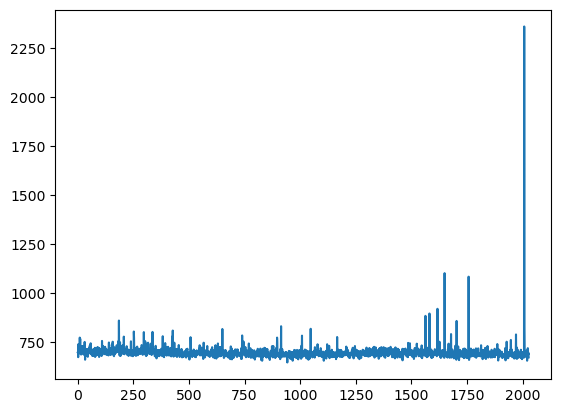

In [14]:
# Erstelle den Plot
spektrum = list(map(int, demo_spectrum_last_val[2].strip('{}').split(',')))
x = [i for i in range(len(spektrum))]
plt.plot(spektrum)
plt.show()